In [1]:
%load_ext autoreload
%autoreload 2

import os, sys
sys.path.append('../scripts/')
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import rasterio
from rasterio.plot import show 
from rasterio.plot import plotting_extent
from dotenv import load_dotenv
from osdatahub import NGD

### Create Urban Mask

In [2]:
# Set API key, details from https://github.com/OrdnanceSurvey/osdatahub
load_dotenv()
key_os = os.environ['KEY']

In [3]:
ngd_collections = NGD.get_collections()
for collection in ngd_collections['collections']:
    print(f' - {collection["title"]} ({collection["id"]})')

 - Building v1 (bld-fts-building-1)
 - Building Line v1 (bld-fts-buildingline-1)
 - Building Part v1 (bld-fts-buildingpart-1)
 - Named Area v1 (gnm-fts-namedarea-1)
 - Named Point v1 (gnm-fts-namedpoint-1)
 - Land v1 (lnd-fts-land-1)
 - Landform v1 (lnd-fts-landform-1)
 - Landform Line v1 (lnd-fts-landformline-1)
 - Landform Point v1 (lnd-fts-landformpoint-1)
 - Land Point v1 (lnd-fts-landpoint-1)
 - Site v1 (lus-fts-site-1)
 - Site Access Location v1 (lus-fts-siteaccesslocation-1)
 - Site Routing Point v1 (lus-fts-siteroutingpoint-1)
 - Compound Structure v1 (str-fts-compoundstructure-1)
 - Structure v1 (str-fts-structure-1)
 - Structure Line v1 (str-fts-structureline-1)
 - Structure Point v1 (str-fts-structurepoint-1)
 - Cartographic Rail Detail v1 (trn-fts-cartographicraildetail-1)
 - Rail v1 (trn-fts-rail-1)
 - Road Line v1 (trn-fts-roadline-1)
 - Road Track Or Path v1 (trn-fts-roadtrackorpath-1)
 - Connecting Link v1 (trn-ntwk-connectinglink-1)
 - Connecting Node v1 (trn-ntwk-conn

In [4]:
# define layer for bbox extent & OS-API collection
lyr = rasterio.open("../content/tifs/1k_tifs/SK1868.tif")

# define os collections for urban mask aggreation
collections = {'buildings' : 'bld-fts-buildingpart-1',
               'sites' : 'lus-fts-site-1', 
               'railways' : 'trn-fts-rail-1', 
               'land' : 'lnd-fts-land-1',
               'water' : 'wtr-fts-waterpoint-1',
               'road' : 'trn-fts-roadline-1',
               'track' : 'trn-fts-roadtrackorpath-1',
               'waterlink' : 'wtr-ntwk-waterlink-1',
               'waterlinkset' : 'wtr-ntwk-waterlinkset-1'}

# if specifics are required from 'collection' define which to keep from 'description' 
subsets = {'Land' : ['Made Surface', 'Residential Garden', 'Non-Coniferous Trees', 'Coniferous Trees', 'Mixed Trees']}

In [37]:
from mask_os import Mask
# create object (eventually loop through 500 1k tiles here?)
SK1868 = Mask(lyr, collections, subsets)
# get the bbox of the layer
SK1868.bb()
# query the os api and return and geonadas (geopandas df)
SK1868 = SK1868.os_mask()

ngd_buildings query contains the following number of features:18
ngd_sites query contains the following number of features:1
railways query is empty!
ngd_land query contains the following number of features:129
ngd_water query contains the following number of features:1
road query is empty!
ngd_track query contains the following number of features:34
waterlink query is empty!
waterlinkset query is empty!


(Text(0.5, 190.7222222222222, 'Eastings'),
 Text(187.36365414706307, 0.5, 'Northings'))

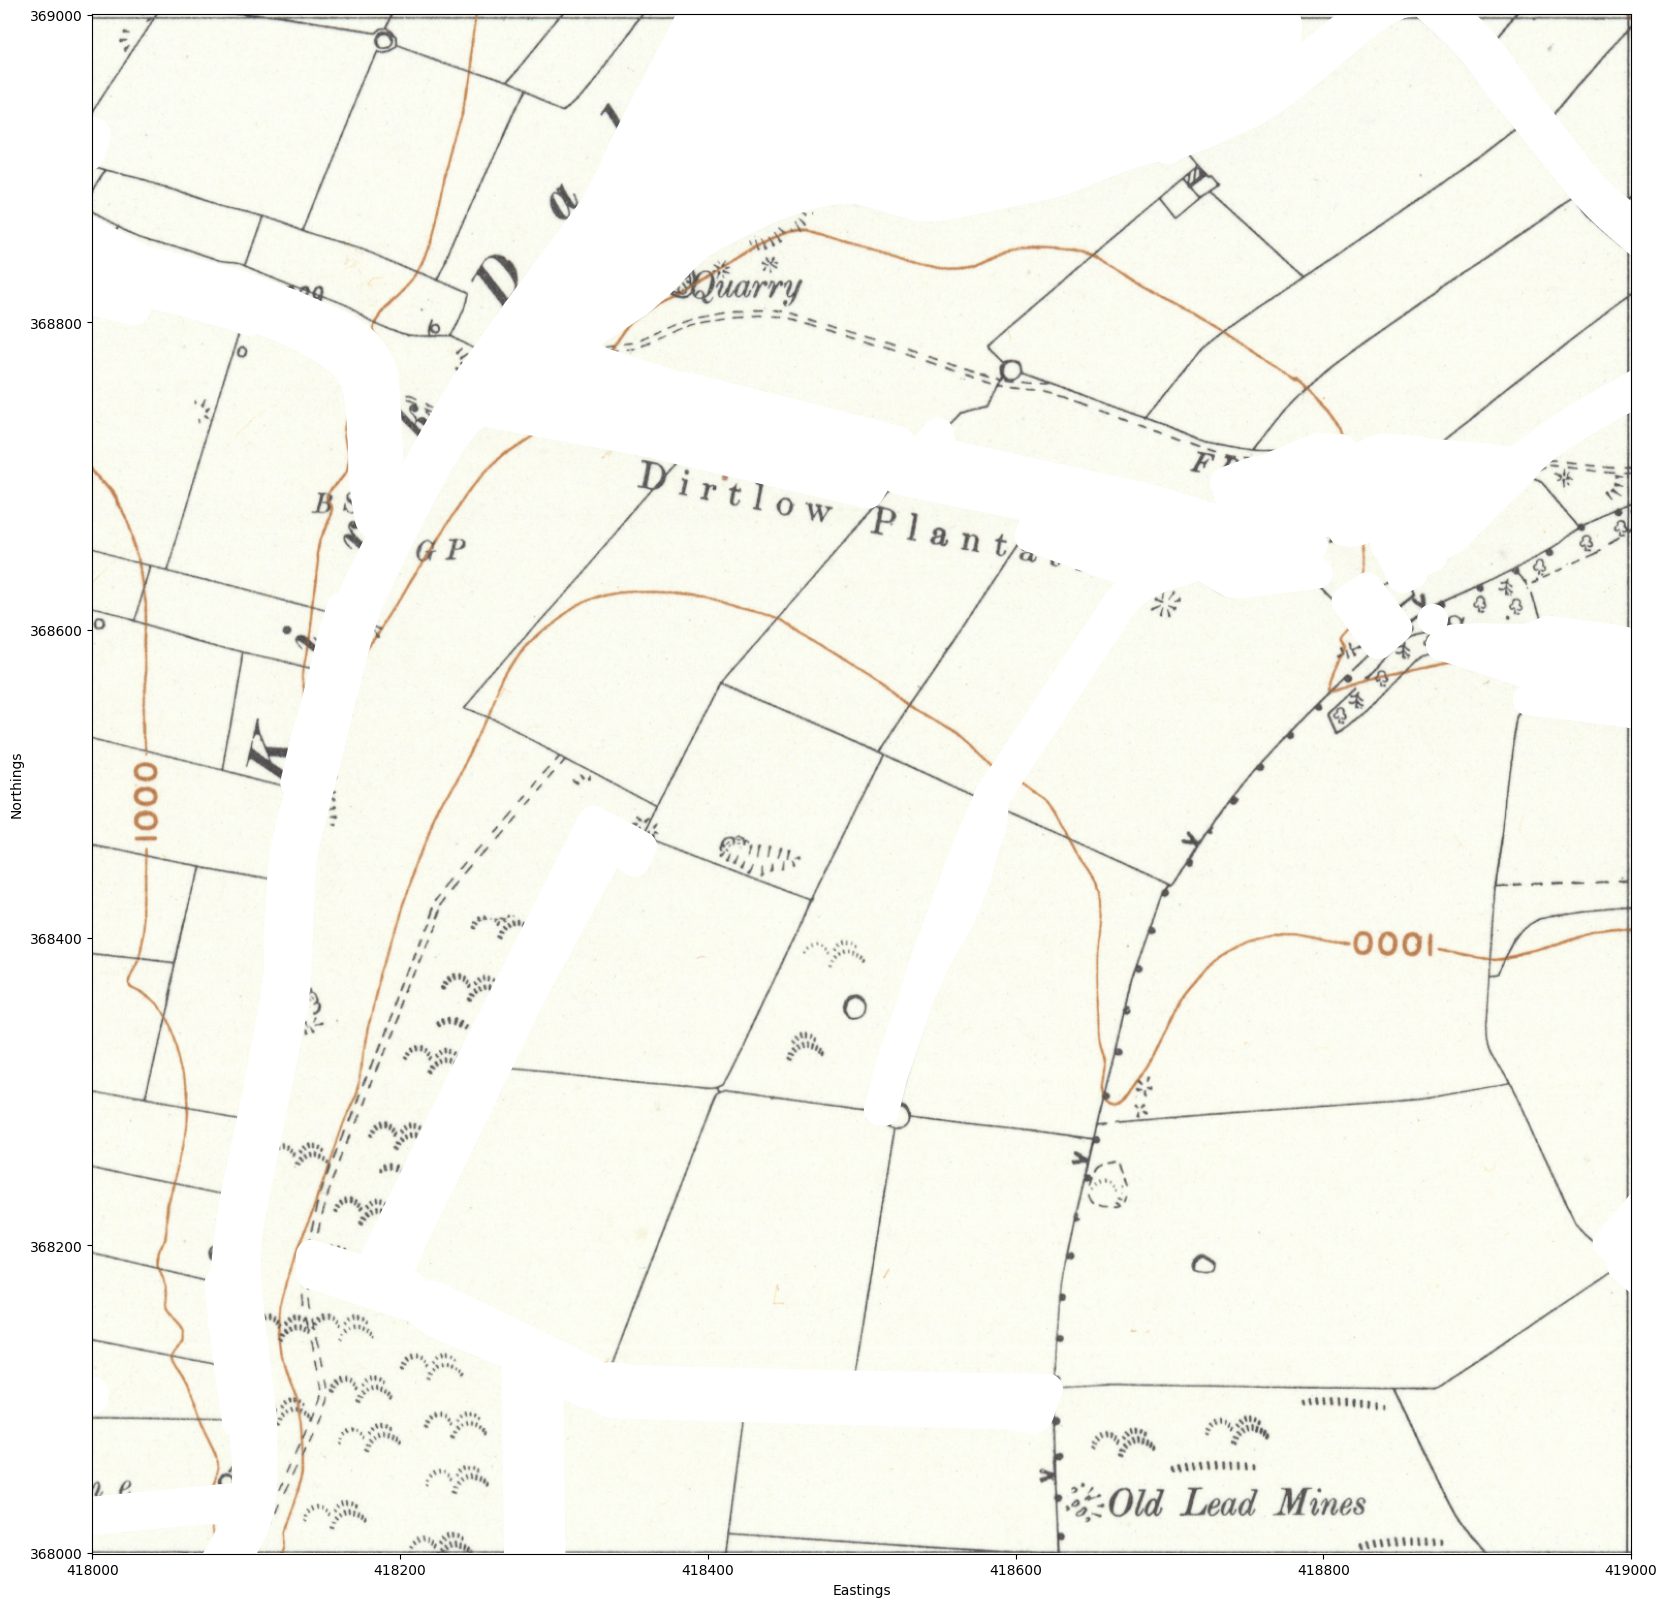

In [38]:
ax = SK1868.plot(color="white", alpha=1, figsize=(20, 20))
show(lyr, ax=ax, with_bounds=True)
ax.set_xlabel("Eastings"), ax.set_ylabel("Northings")
#ax.set_xlim(417000, xmax=419000)
#ax.set_ylim(367000, ymax=369000)

#### Output as raster for map-reader.ipynb

In [45]:
# add a column for raster value labels
SK1868['theme'] = 1
SK1868.head()

,geometry,theme
0,"MULTIPOLYGON (((417531.804 368802.204, 417545....",1


In [46]:
# raster calcs
print(lyr.width)
print(lyr.height)
print(lyr.meta)

1490
1491
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 255.0, 'width': 1490, 'height': 1491, 'count': 3, 'crs': CRS.from_epsg(27700), 'transform': Affine(0.6713639789762135, 0.0, 417999.7823474275,
       0.0, -0.6713639789762267, 369000.65026383003)}


In [11]:
ex_raster = mvar.convert_shp_mask_to_raster(df_shp=mask,
                                           plot_raster=False,
                                           save_raster=True,
                                           verbose=1)

Current data size cube is 55.27382 MB
New cube data size is 6.946044 MB
Saved to ../content/tifs/mask.tif


In [ ]:
# save as a new file 
out_file_path = r"../content/ngd_boundaries/mask.shp"
mask.to_file(out_file_path)

In [1]:
# circle.py

import math

class Circle:
    def __init__(self, radius):
        self.radius = radius

    def calculate_area(self):
        return round(math.pi * self.radius ** 2, 2)

In [2]:
circle_1 = Circle(42) # creates the object in python # accepts the same arguments as the __init___ method
circle_2 = Circle(43) # calling the class constructor with different argument values = create different objects / instances of the target class

In [3]:
circle_1

In [4]:
circle_1.radius # accessing the objects or methods of that class

42

In [ ]:
subsets = {'Land' : 'Made Surface',
            'Land' : 'Residential Garden', 
            'Land' : 'Non-Coniferous Trees', 
            'Land' : 'Coniferous Trees',
            'Land' : 'Mixed Trees'}

In [204]:
# declare a dictionary
record = { 
 
 'Name' : ['Ankit', 'Swapnil', 'Aishwarya', 
          'Priyanka', 'Shivangi', 'Shaurya' ],
   
 'Age' : [22, 20, 21, 19, 18, 22], 
   
 'Stream' : ['Math', 'Commerce', 'Science', 
            'Math', 'Math', 'Science'], 
   
 'Percentage' : [90, 90, 96, 75, 70, 80] } 
   
# create a dataframe 
dataframe = pd.DataFrame(record,
                         columns = ['Name', 'Age', 
                                    'Stream', 'Percentage']) 
# show the Dataframe
print("Given Dataframe :\n", dataframe)

Given Dataframe :
         Name  Age    Stream  Percentage
0      Ankit   22      Math          90
1    Swapnil   20  Commerce          90
2  Aishwarya   21   Science          96
3   Priyanka   19      Math          75
4   Shivangi   18      Math          70
5    Shaurya   22   Science          80


In [205]:

options = ['Science', 'Commerce'] 
   
# selecting rows based on condition 
rslt_df = dataframe[dataframe['Stream'].isin(options)] 
   
print('\nResult dataframe :\n',
      rslt_df)


Result dataframe :
         Name  Age    Stream  Percentage
1    Swapnil   20  Commerce          90
2  Aishwarya   21   Science          96
5    Shaurya   22   Science          80


In [206]:
options

['Science', 'Commerce']